In [1]:
# Import Libraries
# Basic data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time series model
from statsmodels.tsa.arima.model import ARIMA

# Evaluation metric
from sklearn.metrics import mean_squared_error


In [2]:
# Load the dataset
# Load the seasonally adjusted retail sales dataset
df = pd.read_csv("SeriesReport-Seasonally Adjusted Sales - Monthly (Millions of Dollars).csv")

# Display the first few rows
df.head()


,Period,Value
0,01-01-1992,164095.0
1,01-02-1992,164213.0
2,01-03-1992,163721.0
3,01-04-1992,164709.0
4,01-05-1992,165612.0


In [3]:
# Explore and Clean Data
# Show column names
print("Columns:", df.columns)

# Rename columns for convenience
df.columns = ['Date', 'Sales']

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Check for missing values
print("\nMissing values:\n", df.isna().sum())

# Drop any rows with missing values (if any)
df.dropna(inplace=True)

# Display final dataframe info
df.info()


Columns: Index(['Period', 'Value'], dtype='object')

Missing values:
 Sales    7
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 341 entries, 1992-01-01 to 2020-01-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   341 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


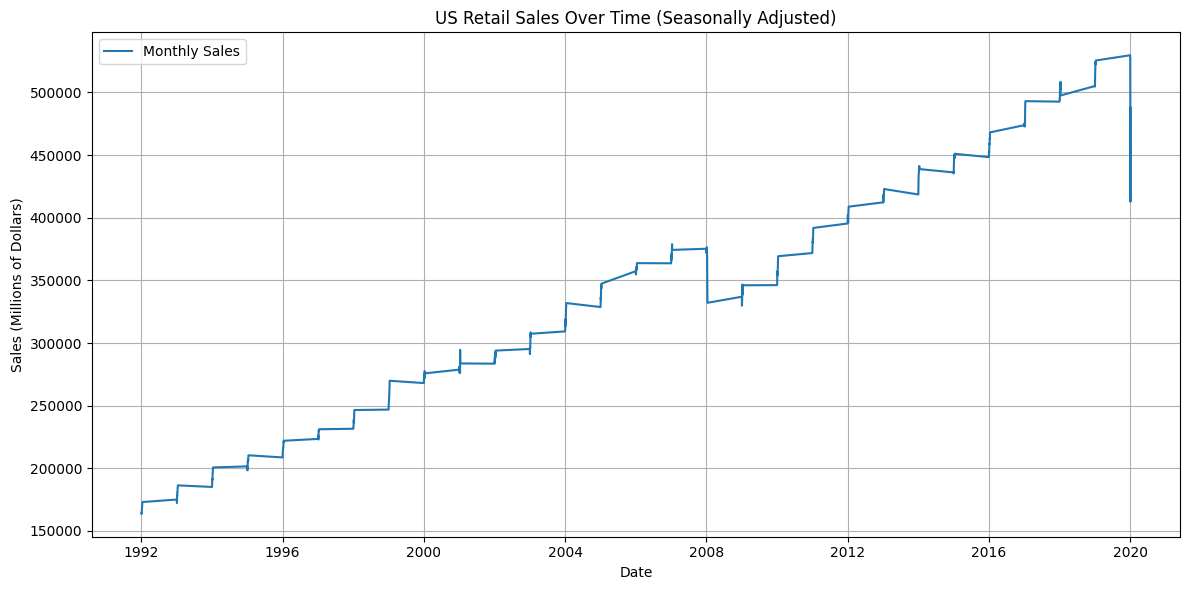

In [4]:
# Plot the Time Series
# Plot the retail sales time series
plt.figure(figsize=(12,6))
plt.plot(df['Sales'], label='Monthly Sales')
plt.title("US Retail Sales Over Time (Seasonally Adjusted)")
plt.xlabel("Date")
plt.ylabel("Sales (Millions of Dollars)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# Split the Data into Train and Test
# Use 80% of data for training and 20% for testing
train_size = int(len(df) * 0.8)
train, test = df['Sales'][:train_size], df['Sales'][train_size:]

print(f"Training size: {len(train)}")
print(f"Testing size: {len(test)}")


Training size: 272
Testing size: 69


In [6]:
# Fit ARIMA model (you can tune p,d,q based on AIC/BIC or auto_arima later)
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


c:\Users\rishi\OneDrive\Desktop\PYTHON\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rishi\OneDrive\Desktop\PYTHON\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rishi\OneDrive\Desktop\PYTHON\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  272
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2559.484
Date:                Tue, 29 Jul 2025   AIC                           5124.968
Time:                        11:26:56   BIC                           5135.774
Sample:                             0   HQIC                          5129.306
                                - 272                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.003    336.049      0.000       0.994       1.006
ma.L1         -0.9984      0.014    -72.886      0.000      -1.025      -0.972
sigma2      9.361e+06   9.36e-11      1e+17      0.0

c:\Users\rishi\OneDrive\Desktop\PYTHON\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\rishi\OneDrive\Desktop\PYTHON\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


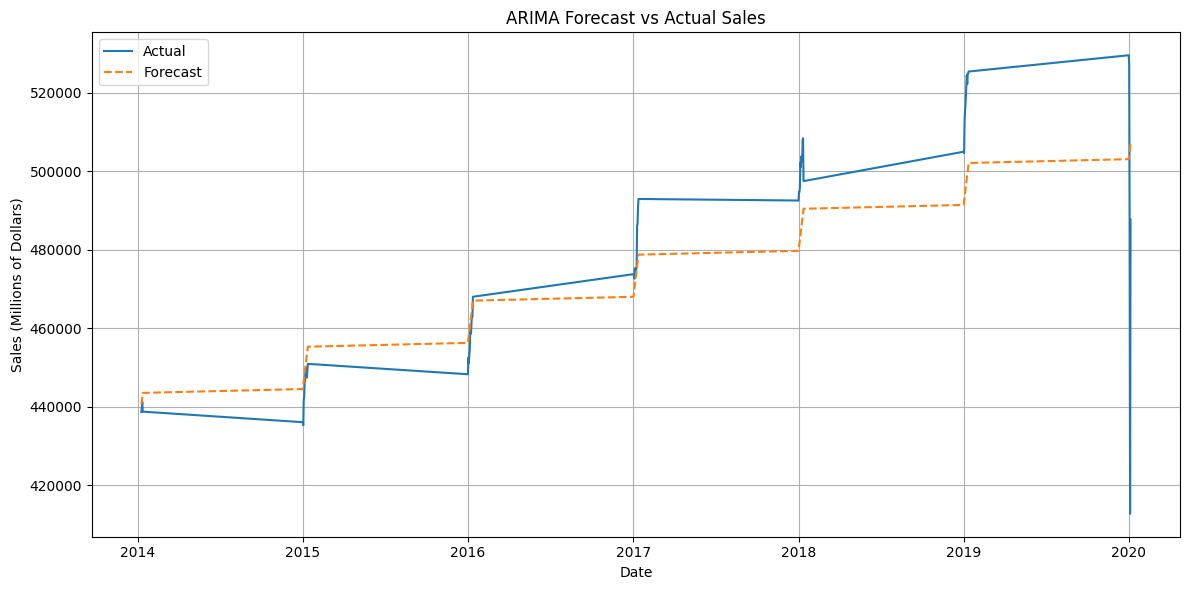

Root Mean Squared Error (RMSE): 17295.06


In [7]:
# Forecast and Evaluate
# Forecast for the length of the test set
forecast = model_fit.forecast(steps=len(test))

# Plot forecast vs actual
plt.figure(figsize=(12,6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales (Millions of Dollars)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


c:\Users\rishi\OneDrive\Desktop\PYTHON\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rishi\OneDrive\Desktop\PYTHON\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rishi\OneDrive\Desktop\PYTHON\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rishi\OneDrive\Desktop\PYTHON\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

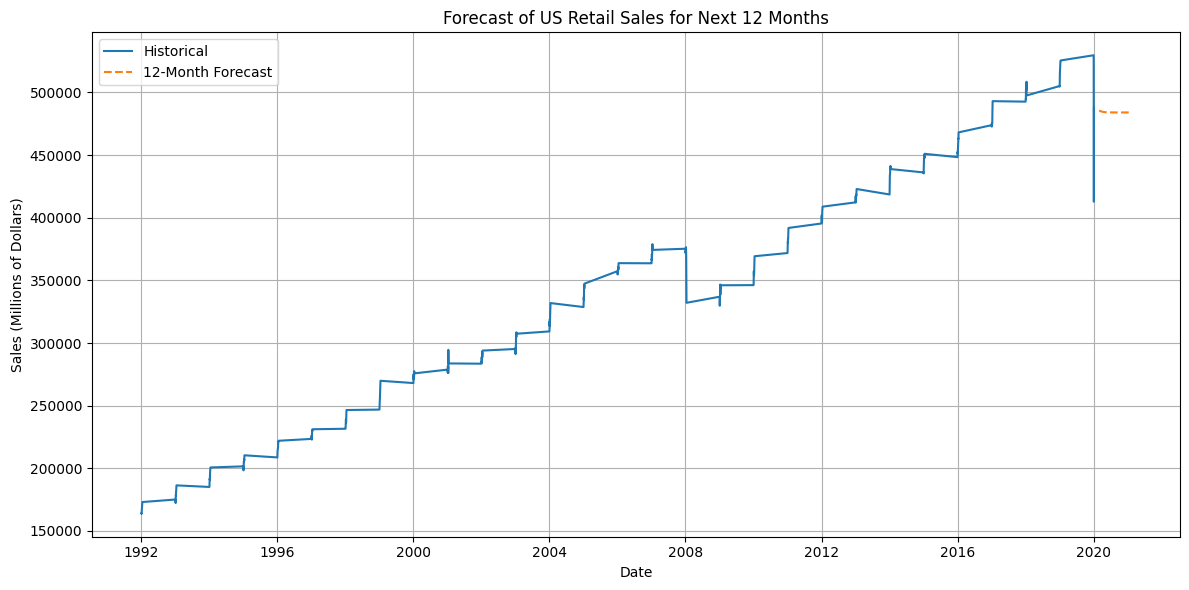

In [8]:
# Forecast Future Sales
# Fit ARIMA on the full dataset
final_model = ARIMA(df['Sales'], order=(1,1,1))
final_model_fit = final_model.fit()

# Forecast next 12 months
future_forecast = final_model_fit.forecast(steps=12)

# Create future dates index
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')

# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(df['Sales'], label='Historical')
plt.plot(future_dates, future_forecast, label='12-Month Forecast', linestyle='--')
plt.title("Forecast of US Retail Sales for Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Sales (Millions of Dollars)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
